C:\Users\bkell\AppData\Local\Temp\ipykernel_12984\178556467.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salary_data5['Cost of Living Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Cost of Living Index']
C:\Users\bkell\AppData\Local\Temp\ipykernel_12984\178556467.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salary_data5['Rent Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Rent Index']
C:\Users\bkell\AppData\Local\Temp\ipykernel_12984\178556467.py:82: S

<Axes: title={'center': 'Comparison of Salary and Individual Cost of Living Index'}, xlabel='Country', ylabel='Index Score'>

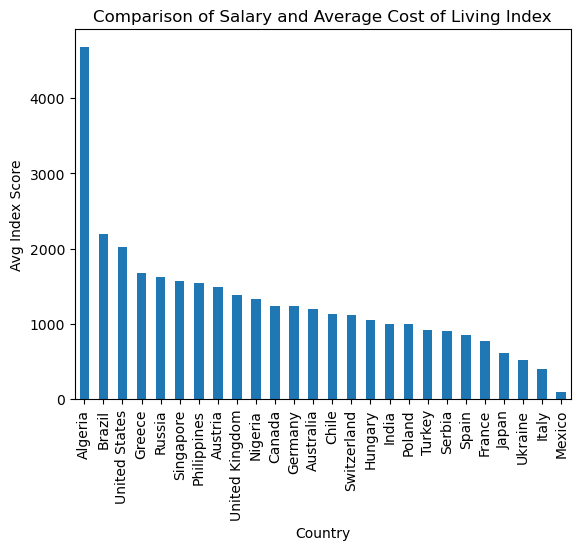

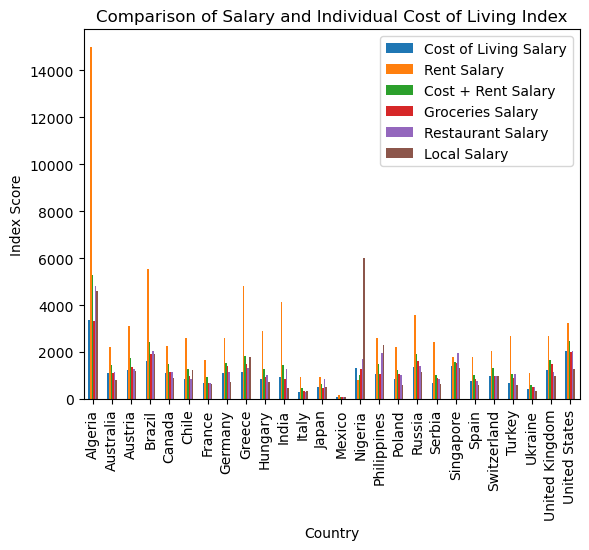

In [2]:
"""

DSE5002 Python Project
Due Date: 12/15/2023
Author: Ben Kelley

"""

import pandas as pd
import matplotlib.pyplot as plt

############################import and cleaning###############################
##############################################################################

## import csv files
ds_salaries = pd.read_csv("E:\Data Science Master's\DSE5002\ds_salaries.csv")
country_codes = pd.read_excel("E:\Data Science Master's\DSE5002\country_codes.xlsx")
cost_living = pd.read_csv("E:\Data Science Master's\DSE5002\cost_of_living.csv")
levels_fyi_salary_data = pd.read_csv("E:\Data Science Master's\DSE5002\Levels_Fyi_Salary_Data.csv")


###### code to tidy salary data by country from ds_salary#####
## filter salary databases to contain only Data Scientist positions
ds_salary_data = ds_salaries.query('job_title == "Data Scientist"')


## standardize country code columns in each db to prep to concatenate
ds_salary_data1 = ds_salary_data.rename(columns={'employee_residence': 'alpha2_code'})
ds_salary_data2 = ds_salary_data1.rename(columns={'salary_in_usd': 'Avg_Salary_USD'})
country_codes = country_codes.rename(columns={'Alpha-2 code': 'alpha2_code'})


## concatenate ds_salary_data1 and country_codes
from functools import reduce
ds_salary_data2 = reduce(lambda x,y: pd.merge(x,y, on='alpha2_code', how='outer'), [ds_salary_data2, country_codes])
ds_salary_data3 = ds_salary_data2.mask(ds_salary_data2.eq('nan')).dropna()


## correct a few country names to match cost of living df so they can be compared
ds_salary_data3['Country'] = ds_salary_data3['Country'].replace(['Philippines (the)'], 'Philippines')
ds_salary_data3['Country'] = ds_salary_data3['Country'].replace(['Russian Federation (the)'], 'Russia')
ds_salary_data3['Country'] = ds_salary_data3['Country'].replace(['United Kingdom of Great Britain and Northern Ireland (the)'], 'United Kingdom')
ds_salary_data3['Country'] = ds_salary_data3['Country'].replace(['United States of America (the)'], 'United States')
ds_salary_data4 = ds_salary_data3.groupby('Country')['Avg_Salary_USD'].mean()
avg_salary = ds_salary_data3.groupby('Country')['Avg_Salary_USD'].mean()


#####code to tidy cost of living data from cost_living #####
## split city, country
cost_living[['City', 'Country']] = cost_living['City'].str.rsplit(', ', expand=True, n=1)
cost_living2 = cost_living.drop(['City', "Rank"], axis=1)
cost_living3 = cost_living2.groupby('Country').mean()


######################################analysis################################
##############################################################################

## concatenate the average index and salaries for each country
avg_index = cost_living3.mean(axis=1)
avg_index = pd.concat([avg_index, avg_salary], axis=1)
avg_index = avg_index.mask(avg_index.eq('nan')).dropna()
avg_index = avg_index.rename(columns={0: 'Avg Index'})


## factor salary into cost of living to give each country an average "score" 
salary_index = avg_index['Index Score'] = avg_index['Avg_Salary_USD'] / avg_index['Avg Index']


#find the top 10 countries based on average index
salary_index1 = avg_index['Index Score'].sort_values(ascending=False)


## merging cost of living and salary dataframes so I can compare salary to each cost index
ds_salary_data4 = reduce(lambda x,y: pd.merge(x,y, on='Country', how='outer'), [ds_salary_data4, cost_living3])
ds_salary_data5 = ds_salary_data4.dropna()


## this was a bit of brute force method but I wanted to compare the average salary for each country to the individual index for each 
## country. divide average salary by country by each index to give each index and country a "score"
ds_salary_data5['Cost of Living Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Cost of Living Index']
ds_salary_data5['Rent Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Rent Index']
ds_salary_data5['Cost + Rent Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Cost of Living Plus Rent Index']
ds_salary_data5['Groceries Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Groceries Index']
ds_salary_data5['Restaurant Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Restaurant Price Index']
ds_salary_data5['Local Salary'] = ds_salary_data5['Avg_Salary_USD'] / ds_salary_data5['Local Purchasing Power Index']
salary_index_score = ds_salary_data5.drop(['Avg_Salary_USD','Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index'], axis=1)


##################################visuals#####################################
##############################################################################


#bar plot to show average salary by contry and average index by country
salary_index1.plot.bar(title="Comparison of Salary and Average Cost of Living Index", ylabel='Avg Index Score')


#bar plot to show salary/index relationship
salary_index_score.plot.bar(title="Comparison of Salary and Individual Cost of Living Index", ylabel='Index Score')


################################analysis#####################################
#############################################################################
#I decided to conduct my research based on country rather than city because
#even though it gives a more generalized result, I found that there was more
#data in relation to the cost of living index so I think that provides more useful
#analysis. I found the average income by country and then also found the average
#index by country which allowed me to rank each coutry in descnding order. This 
#gave me Algeria, Brazil, United States, Greece and Russia as the top 5 countries
#to live in regards to income compared to cost of living. This made sense to me 
#because as the cost of living decreases, your income will go further, so it would
#be very surprising if the top 5 countries by salary were also the top 5 picks 
#in relation to cost of living. I also compared each individual index to the 
#average income for each country and displayed that in a bar plot. This shows 
#the variation in each index for each counrty - for example, if renting a home 
#is an important factor, you can easily see Algeria and Brazil are great 
#options for renting.